In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [2]:
import tensorflow as tf


In [3]:
tf.__version__

'2.3.0'

In [4]:
from tensorflow import keras

In [5]:
keras.__version__

'2.4.0'

In [6]:
from keras.datasets import mnist

In [7]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
X_train , y_train = data[0]

In [9]:
X_test, y_test = data[1]

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [11]:
import matplotlib.pyplot as plt


In [12]:
print(y_train[2])

4


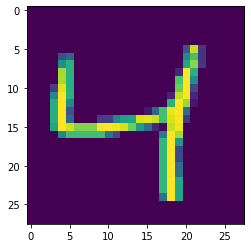

In [13]:
plt.imshow(X_train[2])

In [14]:
X_train[1500].shape

(28, 28)

In [15]:
print(X_train[1500])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 120 223 249 217 244
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 186 254 149  5

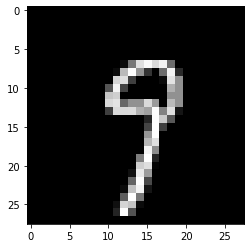

In [16]:
plt.imshow(X_train[1500],cmap = "gray")

In [17]:
import numpy as np

In [18]:
a_list = np.array([1,3,50,100,200,255])

In [19]:
a_list/255

array([0.00392157, 0.01176471, 0.19607843, 0.39215686, 0.78431373,
       1.        ])

In [20]:
X_train = X_train/255

In [21]:
X_train[1500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
y_train = tf.keras.utils.to_categorical(y_train)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.activations import relu,softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [25]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(1024,activation=relu))
model.add(Dense(10,activation=softmax))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer=SGD(),loss = categorical_crossentropy,metrics=["acc"])

In [30]:
model.fit(x=X_train,y=y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1359 - acc: 0.9622
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1279 - acc: 0.9645
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - acc: 0.9670
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147 - acc: 0.9691
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - acc: 0.9704
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1037 - acc: 0.9724
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0989 - acc: 0.9734
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0945 - acc: 0.9746
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - acc: 0.9757
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0867 - acc: 0.9768
Epoch 11/100
1875/1

In [31]:
  ??model.fit()